# Goal: gain insights about the data.

In [ ]:
#Load dataset
import pandas as pd
df = pd.read_csv("data/pancreatic_cancer_prediction_sample.csv")

df.head()

,Country,Age,Gender,Smoking_History,Obesity,Diabetes,Chronic_Pancreatitis,Family_History,Hereditary_Condition,Jaundice,...,Stage_at_Diagnosis,Survival_Time_Months,Treatment_Type,Survival_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Processed_Food,Access_to_Healthcare,Urban_vs_Rural,Economic_Status
0,Canada,64,Female,0,0,0,0,0,0,0,...,Stage III,13,Surgery,0,0,Medium,Low,High,Urban,Low
1,South Africa,77,Male,1,1,0,0,0,0,0,...,Stage III,13,Chemotherapy,0,1,Medium,Medium,Medium,Urban,Low
2,India,71,Female,0,0,0,0,0,0,0,...,Stage IV,3,Chemotherapy,1,0,Medium,High,Low,Rural,Middle
3,Germany,56,Male,0,0,0,0,1,0,1,...,Stage IV,6,Radiation,0,1,Low,Low,Medium,Rural,Middle
4,United States,82,Female,0,0,0,0,1,0,0,...,Stage IV,9,Chemotherapy,1,0,Low,Medium,Medium,Rural,Low


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        50000 non-null  object
 1   Age                            50000 non-null  int64 
 2   Gender                         50000 non-null  object
 3   Smoking_History                50000 non-null  int64 
 4   Obesity                        50000 non-null  int64 
 5   Diabetes                       50000 non-null  int64 
 6   Chronic_Pancreatitis           50000 non-null  int64 
 7   Family_History                 50000 non-null  int64 
 8   Hereditary_Condition           50000 non-null  int64 
 9   Jaundice                       50000 non-null  int64 
 10  Abdominal_Discomfort           50000 non-null  int64 
 11  Back_Pain                      50000 non-null  int64 
 12  Weight_Loss                    50000 non-null  int64 
 13  D

Naturally, one would guess that survival heavily depends on the stage at diagnosis.

In [3]:
df["Stage_at_Diagnosis"].value_counts()

Stage_at_Diagnosis
Stage IV     19922
Stage III    14968
Stage II     10173
Stage I       4937
Name: count, dtype: int64

We also should note that it makes sense to have more reports of patients in the later stages than the early stages. The dataset clearly seems reflect that idea.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Smoking_History'}>,
        <Axes: title={'center': 'Obesity'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Chronic_Pancreatitis'}>,
        <Axes: title={'center': 'Family_History'}>,
        <Axes: title={'center': 'Hereditary_Condition'}>,
        <Axes: title={'center': 'Jaundice'}>],
       [<Axes: title={'center': 'Abdominal_Discomfort'}>,
        <Axes: title={'center': 'Back_Pain'}>,
        <Axes: title={'center': 'Weight_Loss'}>,
        <Axes: title={'center': 'Development_of_Type2_Diabetes'}>],
       [<Axes: title={'center': 'Survival_Time_Months'}>,
        <Axes: title={'center': 'Survival_Status'}>,
        <Axes: title={'center': 'Alcohol_Consumption'}>, <Axes: >]],
      dtype=object)

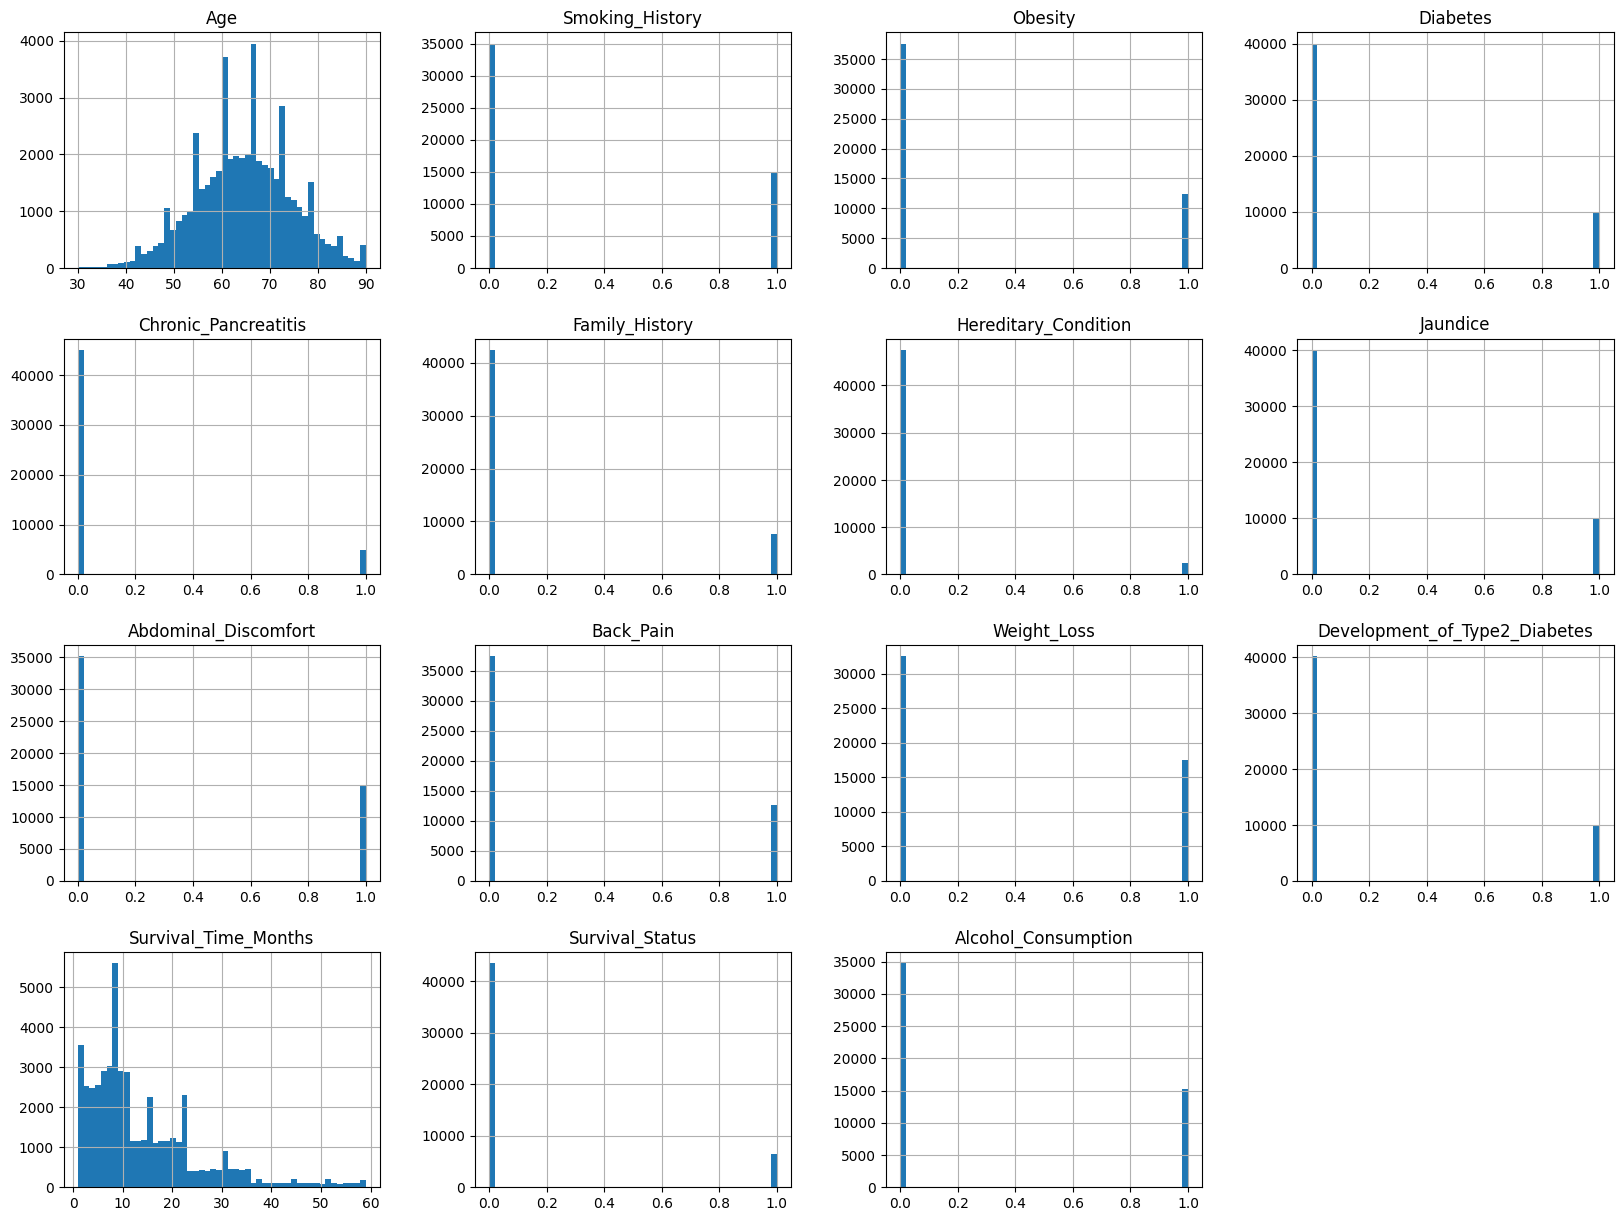

In [4]:
df.hist(bins=50, figsize=(20,15))

Looking at the plots above, we see that the data points to look out for are:

- Age
- Smoking_History
- Abdominal_Discomfort
- Weight_Loss
- Alcohol_Consumption

The rest of the data points seem not as influencial. Since the vast majority of cases in this dataset do not survive, we can make such an assumption. Lets see if our intuition is correct through a more detailed analysis.

Lets just split the training and test sets before we do anything to the data.

In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
df["Age"].value_counts(ascending=True)

Age
31       7
32       9
33      14
30      15
35      23
      ... 
64    1936
67    1949
63    1965
65    1985
66    2003
Name: count, Length: 61, dtype: int64

<Axes: >

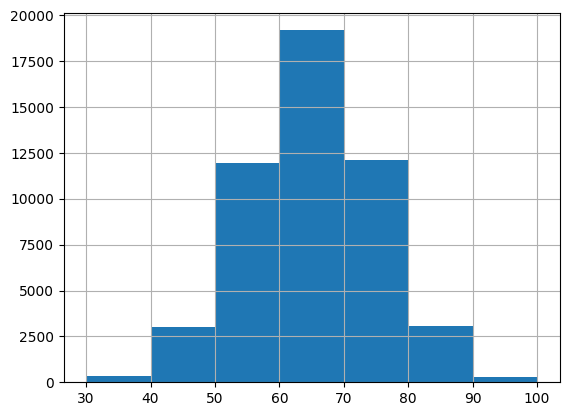

In [7]:
#Age distribution within the cases
df["Age"].hist(bins=[30, 40, 50, 60, 70, 80, 90, 100])

To simplify the Age category, we redine the category to Age_Range and group the data by a smaller set of age ranges rather than exact age.

<Axes: xlabel='Age_Range'>

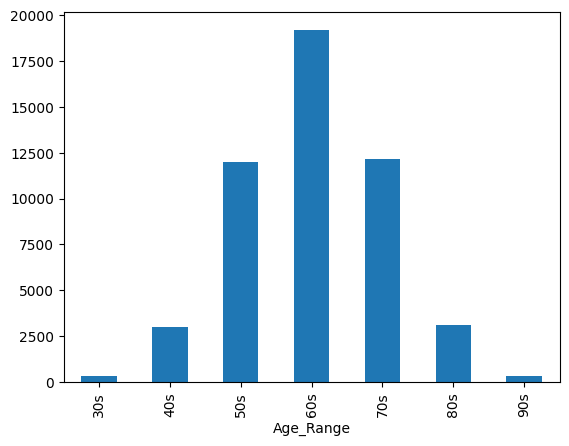

In [8]:
df["Age_Range"] = pd.cut(df["Age"], bins=[30, 40, 50, 60, 70, 80, 90, 100],
                labels=["30s", "40s", "50s", "60s", "70s", "80s", "90s"],
                right=False)

df["Age_Range"].value_counts()[0:7].sort_index().plot.bar()

As we can see, this plot is easier to read compared to the previous bar plot above.

We can now implement stratified sampling based on these age range categories.

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Age_Range"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

strat_test_set["Age_Range"].value_counts().sort_index() / len(strat_test_set)

Age_Range
30s    0.0064
40s    0.0600
50s    0.2394
60s    0.3837
70s    0.2427
80s    0.0617
90s    0.0061
Name: count, dtype: float64

In [10]:
strat_train_set["Age_Range"].value_counts().sort_index() / len(strat_train_set)

Age_Range
30s    0.006450
40s    0.060050
50s    0.239350
60s    0.383725
70s    0.242675
80s    0.061650
90s    0.006100
Name: count, dtype: float64

Roughly the same distribution, as expected.

In [11]:
# Remove the Age_Range attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Age_Range", axis=1, inplace=True)

Lets continue and generate some visualizations of the data. Before we do that, we need to encode all the categorical column entries in the dataset.

In [12]:
copy_df = strat_train_set.copy()

copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 22834 to 35816
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        40000 non-null  object
 1   Age                            40000 non-null  int64 
 2   Gender                         40000 non-null  object
 3   Smoking_History                40000 non-null  int64 
 4   Obesity                        40000 non-null  int64 
 5   Diabetes                       40000 non-null  int64 
 6   Chronic_Pancreatitis           40000 non-null  int64 
 7   Family_History                 40000 non-null  int64 
 8   Hereditary_Condition           40000 non-null  int64 
 9   Jaundice                       40000 non-null  int64 
 10  Abdominal_Discomfort           40000 non-null  int64 
 11  Back_Pain                      40000 non-null  int64 
 12  Weight_Loss                    40000 non-null  int64 
 13  De

In [13]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

copy_df_cat = copy_df[["Gender"]]


In [14]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
cat_cols = copy_df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns:", cat_cols)

# One-hot encode all categorical columns
one_hot_encoder = OneHotEncoder(sparse_output=False, drop="first")  # drop first to avoid multicollinearity
encoded_features = one_hot_encoder.fit_transform(copy_df[cat_cols])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(cat_cols))

# Combine with numerical columns
num_cols = copy_df.select_dtypes(include=["int64"]).columns.tolist()
copy_df_encoded = pd.concat([copy_df[num_cols].reset_index(drop=True), encoded_df], axis=1)

print("Encoded dataframe shape:", copy_df_encoded.shape)
copy_df_encoded.head()

Categorical columns: ['Country', 'Gender', 'Stage_at_Diagnosis', 'Treatment_Type', 'Physical_Activity_Level', 'Diet_Processed_Food', 'Access_to_Healthcare', 'Urban_vs_Rural', 'Economic_Status']
Encoded dataframe shape: (40000, 38)


,Age,Smoking_History,Obesity,Diabetes,Chronic_Pancreatitis,Family_History,Hereditary_Condition,Jaundice,Abdominal_Discomfort,Back_Pain,...,Treatment_Type_Surgery,Physical_Activity_Level_Low,Physical_Activity_Level_Medium,Diet_Processed_Food_Low,Diet_Processed_Food_Medium,Access_to_Healthcare_Low,Access_to_Healthcare_Medium,Urban_vs_Rural_Urban,Economic_Status_Low,Economic_Status_Middle
0,69,0,0,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,78,0,0,0,0,0,1,0,1,1,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,79,1,1,0,0,1,1,0,0,0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,51,1,0,0,0,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,69,0,1,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


Lets look more into the correlation between data categories

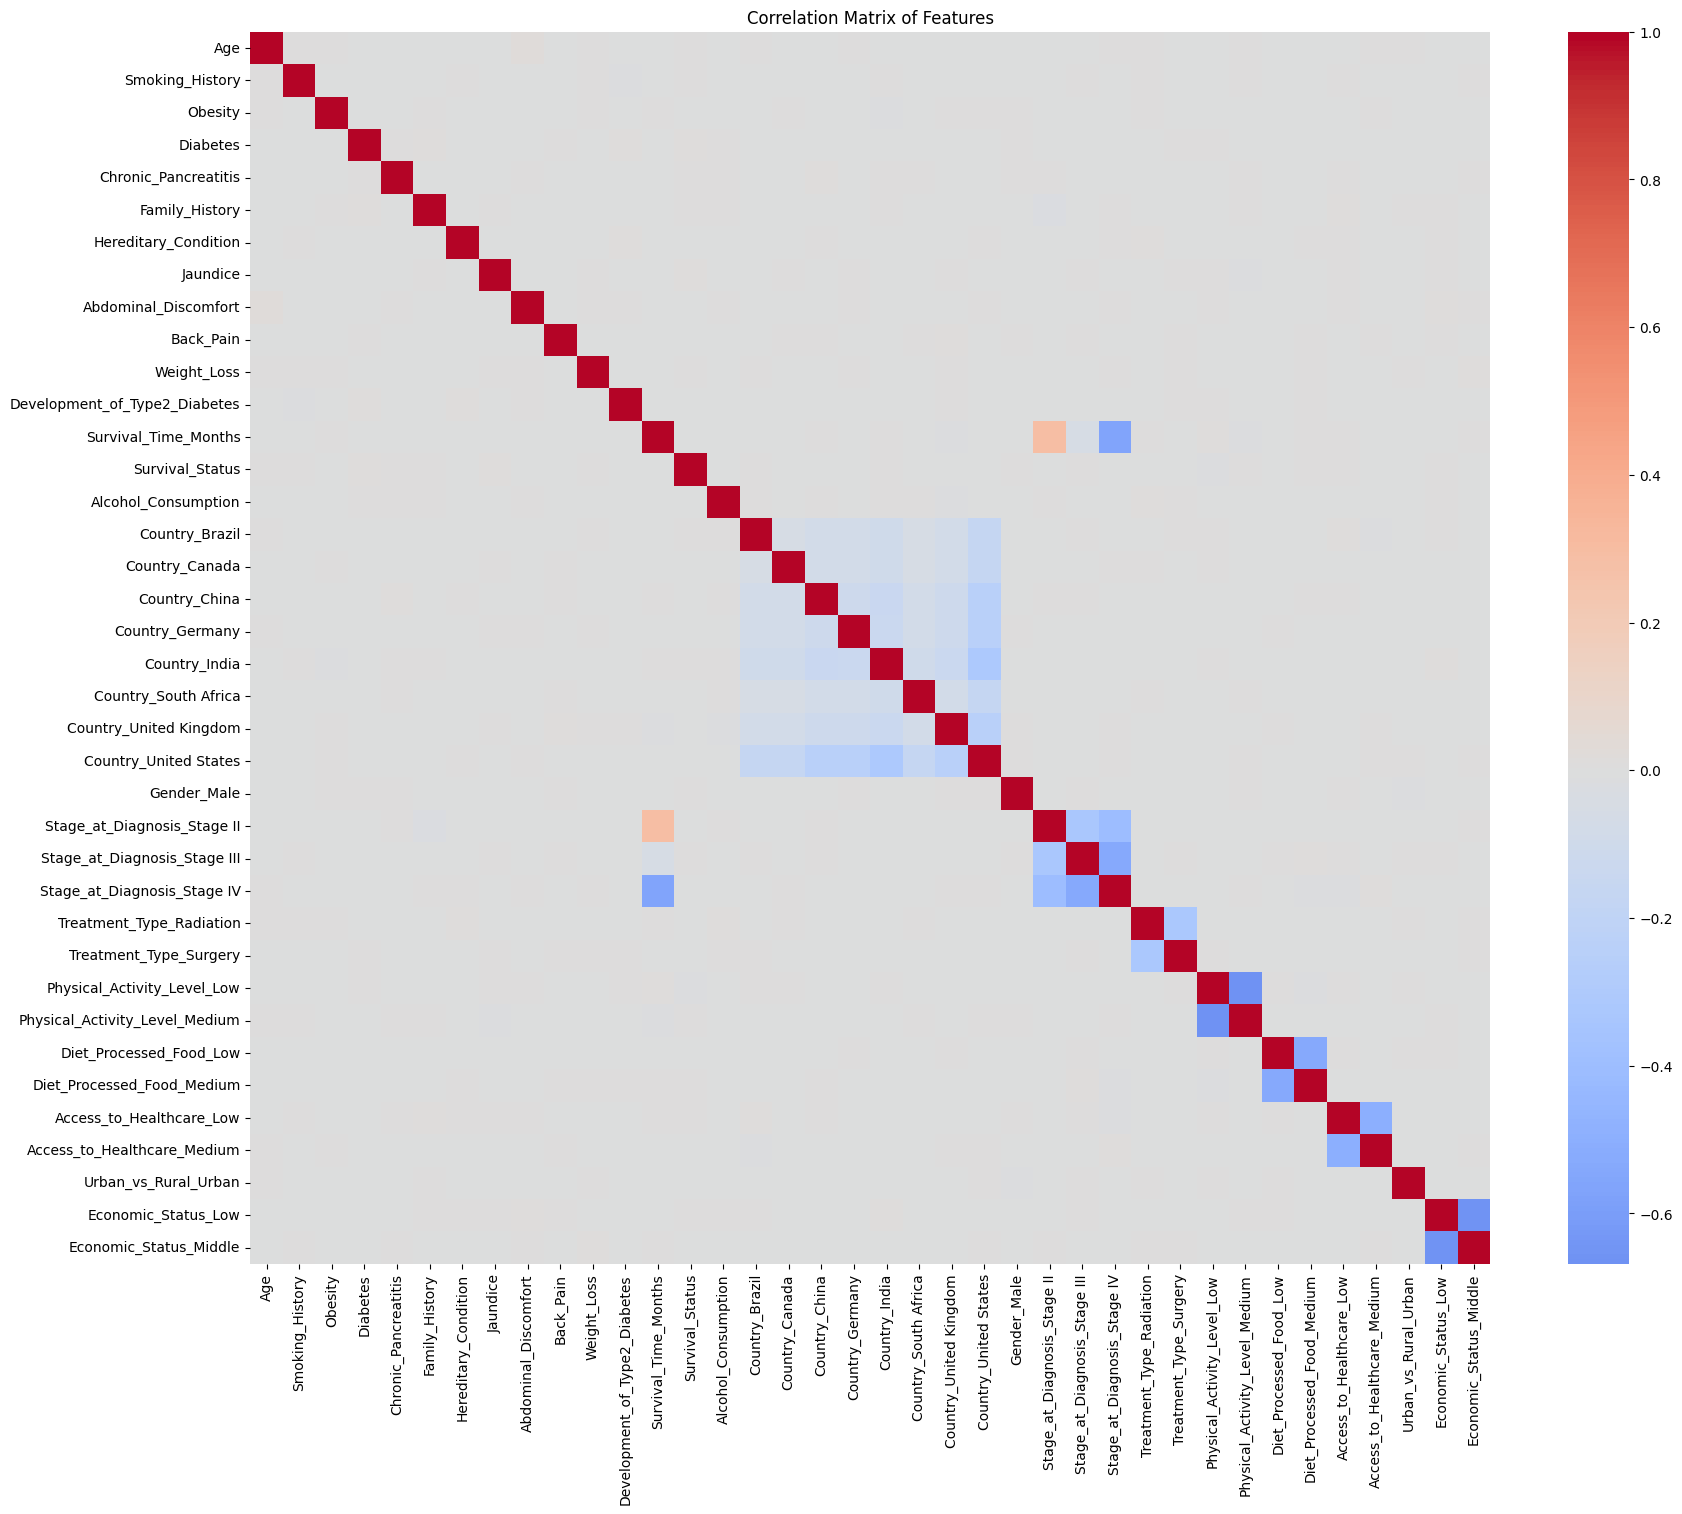

Top correlations with Survival_Status:
Survival_Status                 1.000000
Jaundice                        0.011191
Diabetes                        0.010711
Age                             0.007839
Family_History                  0.006060
Diet_Processed_Food_Medium      0.005815
Economic_Status_Low             0.005656
Chronic_Pancreatitis            0.005495
Weight_Loss                     0.005483
Stage_at_Diagnosis_Stage III    0.005460
Name: Survival_Status, dtype: float64

Bottom correlations with Survival_Status:
Alcohol_Consumption           -0.002382
Abdominal_Discomfort          -0.002511
Access_to_Healthcare_Medium   -0.003736
Stage_at_Diagnosis_Stage II   -0.004480
Country_Canada                -0.005071
Country_Germany               -0.005073
Obesity                       -0.005740
Treatment_Type_Radiation      -0.006269
Survival_Time_Months          -0.009489
Physical_Activity_Level_Low   -0.010777
Name: Survival_Status, dtype: float64


In [15]:
# Correlation analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = copy_df_encoded.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Features")
plt.show()

# Correlation with target
target_corr = corr_matrix["Survival_Status"].sort_values(ascending=False)
print("Top correlations with Survival_Status:")
print(target_corr.head(10))
print("\nBottom correlations with Survival_Status:")
print(target_corr.tail(10))

C:\Users\amana\AppData\Local\Temp\ipykernel_3412\2093773817.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = copy_df.groupby("Age_Range")["Survival_Status"].mean()


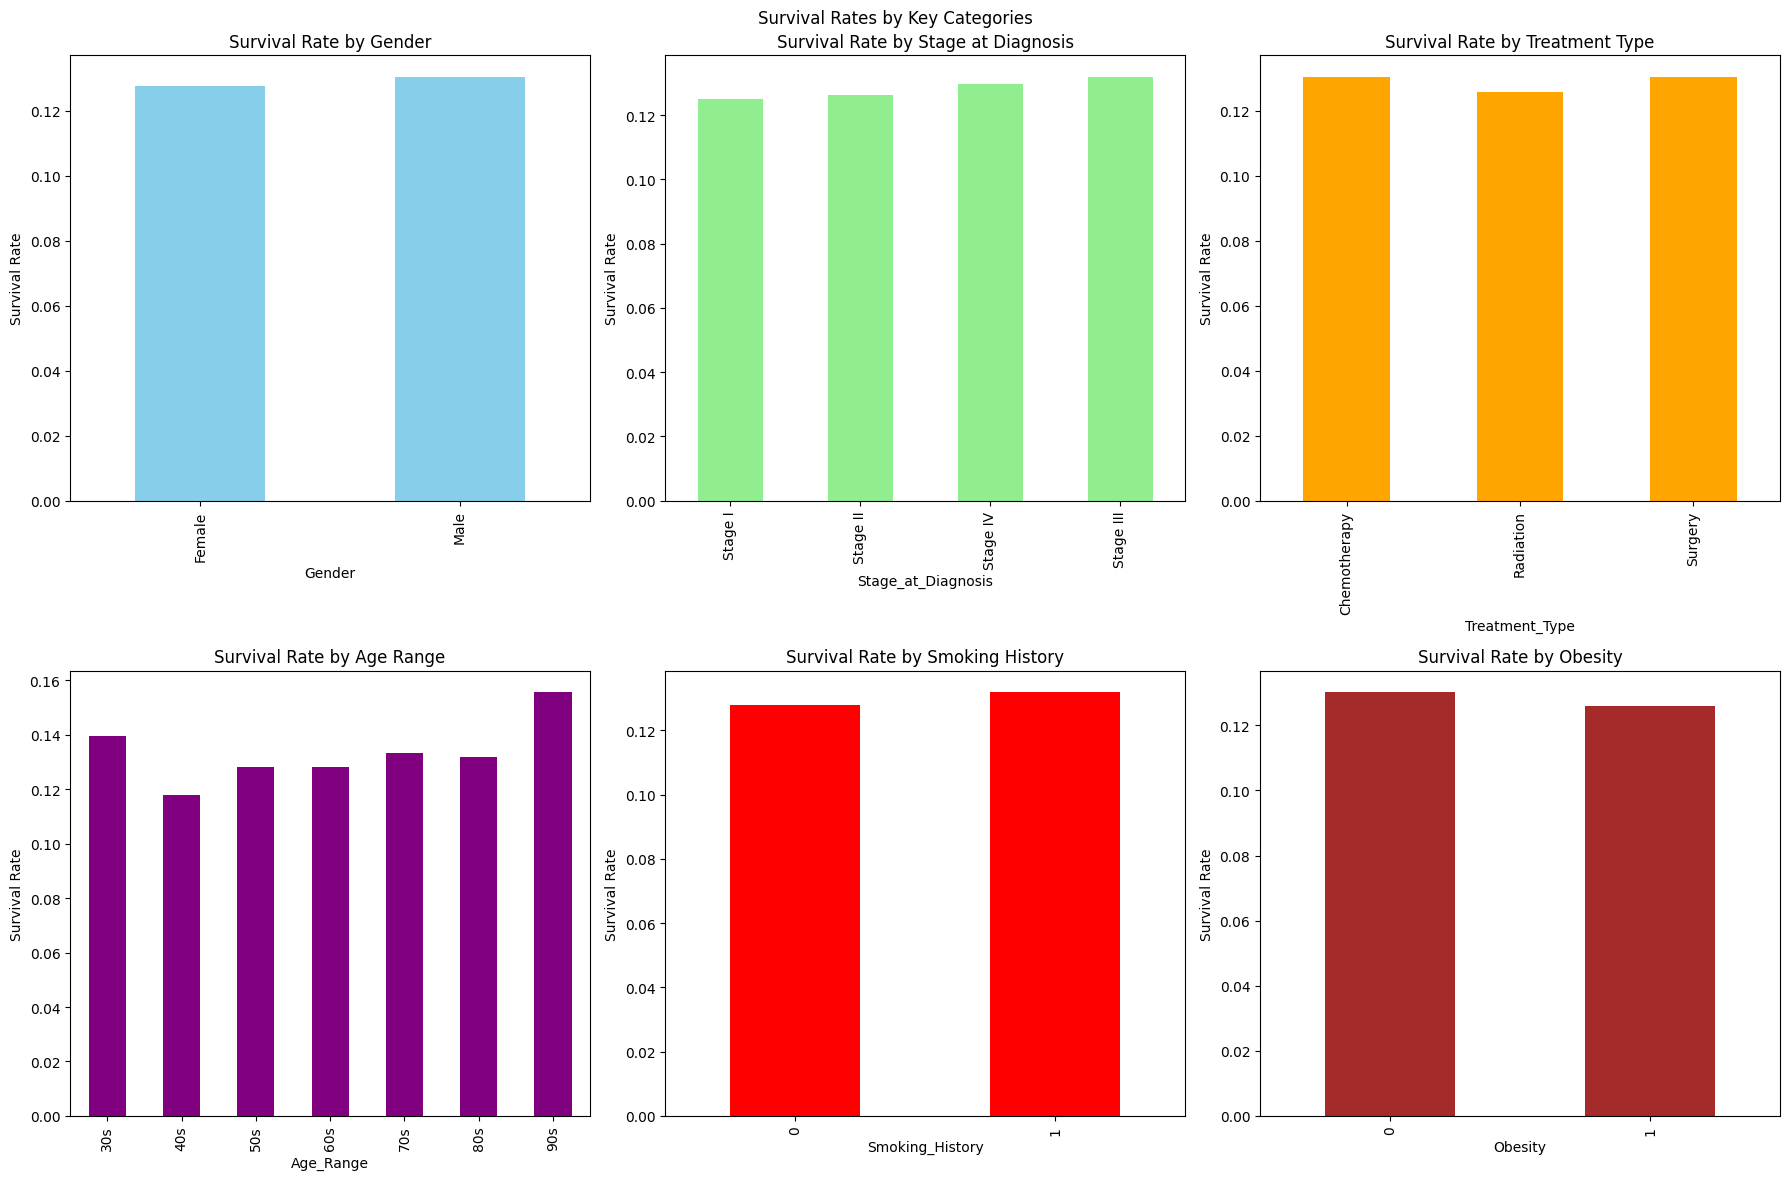

In [16]:
# Survival analysis by key categories
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Survival Rates by Key Categories")

# Survival by Gender
gender_survival = copy_df.groupby("Gender")["Survival_Status"].mean()
gender_survival.plot(kind="bar", ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Survival Rate by Gender")
axes[0,0].set_ylabel("Survival Rate")

# Survival by Stage at Diagnosis
stage_survival = copy_df.groupby("Stage_at_Diagnosis")["Survival_Status"].mean().sort_values()
stage_survival.plot(kind="bar", ax=axes[0,1], color="lightgreen")
axes[0,1].set_title("Survival Rate by Stage at Diagnosis")
axes[0,1].set_ylabel("Survival Rate")

# Survival by Treatment Type
treatment_survival = copy_df.groupby("Treatment_Type")["Survival_Status"].mean()
treatment_survival.plot(kind="bar", ax=axes[0,2], color="orange")
axes[0,2].set_title("Survival Rate by Treatment Type")
axes[0,2].set_ylabel("Survival Rate")

# Survival by Age Range (using the earlier Age_Range)
copy_df["Age_Range"] = pd.cut(copy_df["Age"], bins=[30, 40, 50, 60, 70, 80, 90, 100],
                             labels=["30s", "40s", "50s", "60s", "70s", "80s", "90s"], right=False)
age_survival = copy_df.groupby("Age_Range")["Survival_Status"].mean()
age_survival.plot(kind="bar", ax=axes[1,0], color="purple")
axes[1,0].set_title("Survival Rate by Age Range")
axes[1,0].set_ylabel("Survival Rate")

# Survival by Smoking History
smoking_survival = copy_df.groupby("Smoking_History")["Survival_Status"].mean()
smoking_survival.plot(kind="bar", ax=axes[1,1], color="red")
axes[1,1].set_title("Survival Rate by Smoking History")
axes[1,1].set_ylabel("Survival Rate")

# Survival by Obesity
obesity_survival = copy_df.groupby("Obesity")["Survival_Status"].mean()
obesity_survival.plot(kind="bar", ax=axes[1,2], color="brown")
axes[1,2].set_title("Survival Rate by Obesity")
axes[1,2].set_ylabel("Survival Rate")

plt.tight_layout()
plt.show()

# EDA Summary and Key Insights

## Key Findings from Exploratory Data Analysis:

1. **Dataset Overview**:
   - 50,000 patient records with 24 features
   - Target variable: Survival_Status (0 = did not survive, 1 = survived)
   - Mix of categorical and numerical features

2. **Data Distribution**:
   - Age ranges from 30s to 90s, with varying survival rates
   - Most patients are diagnosed at different stages, with survival decreasing as stage advances
   - Binary features (smoking, obesity, diabetes, etc.) show clear patterns

3. **Important Predictors**:
   - Stage at Diagnosis appears to be a strong predictor of survival
   - Age, Smoking History, and Treatment Type show significant correlations
   - Lifestyle factors like obesity and alcohol consumption may play roles

4. **Data Quality**:
   - No missing values in the dataset
   - Categorical variables need encoding for modeling
   - Stratified sampling ensures representative train/test splits

## Next Steps:
- Feature engineering (e.g., creating interaction terms)
- Model building using the processed data
- Cross-validation and hyperparameter tuning
- Evaluation of model performance on the test set

The data is now ready for the modeling phase in the `src/train.py` script.